In [1]:
import os
import numpy as np
import sys
import os
path = os.path.abspath(".")
print(path)
sys.path.append(path + "\code")
from main import *

C:\Users\Utilisateur\Documents\HETIC\Hub_hetic\Open-Food-Fact\notebook


In [2]:
path = ''
all_implement(path)

NearestNeighbors()


In [3]:
dataset = display_data_vector_available()[1]
display_data_vector_available()

['efficient_net.csv', 'mobile_net.csv', 'vector.csv']

In [ ]:
set_up_model("CNN", "efficient_netB3")
create_database_vectorize(name_database="efficient_netB3.csv", verbose=True,
                              size=(300, 300))

Start create new dataset
number processed: 10
Execution time: 5.520837306976318
number processed: 20
Execution time: 9.904328346252441
number processed: 30
Execution time: 14.340787649154663
number processed: 40
Execution time: 18.962143182754517
number processed: 50
Execution time: 23.375617504119873
number processed: 60
Execution time: 27.56621742248535
number processed: 70
Execution time: 31.95270586013794
number processed: 80
Execution time: 37.228811502456665
number processed: 90
Execution time: 41.8169367313385
number processed: 100
Execution time: 46.73186755180359
number processed: 110
Execution time: 51.6357204914093
number processed: 120
Execution time: 56.20026516914368
number processed: 130
Execution time: 60.30877637863159
number processed: 140
Execution time: 64.49368071556091
number processed: 150
Execution time: 69.29685354232788
number processed: 160
Execution time: 73.77358651161194
number processed: 170
Execution time: 77.90161871910095
number processed: 180
Executio

number processed: 1450
Execution time: 501.04110980033875
number processed: 1460
Execution time: 504.1492977142334
number processed: 1470
Execution time: 507.2192645072937
number processed: 1480
Execution time: 510.31113839149475
number processed: 1490
Execution time: 513.3722393512726
number processed: 1500
Execution time: 516.5640358924866
number processed: 1510
Execution time: 519.7648622989655
number processed: 1520
Execution time: 522.8572773933411
number processed: 1530
Execution time: 525.9340279102325
number processed: 1540
Execution time: 529.010790348053
number processed: 1550
Execution time: 532.2028894424438
number processed: 1560
Execution time: 535.2884171009064
number processed: 1570
Execution time: 538.3647408485413
number processed: 1580
Execution time: 541.4413917064667
number processed: 1590
Execution time: 544.5114727020264
number processed: 1600
Execution time: 547.6724619865417
number processed: 1610
Execution time: 550.7953977584839
number processed: 1620
Executi

number processed: 2900
Execution time: 950.0353128910065
number processed: 2910
Execution time: 953.0960602760315
number processed: 2920
Execution time: 956.1659753322601
number processed: 2930
Execution time: 959.2120227813721
number processed: 2940
Execution time: 962.2881875038147
number processed: 2950
Execution time: 965.3960764408112
number processed: 2960
Execution time: 968.4699599742889
number processed: 2970
Execution time: 971.5114822387695
number processed: 2980
Execution time: 974.578310251236
number processed: 2990
Execution time: 977.6396682262421
number processed: 3000
Execution time: 980.7786161899567
number processed: 3010
Execution time: 983.8174471855164
number processed: 3020
Execution time: 986.8945600986481
number processed: 3030
Execution time: 989.9174160957336
number processed: 3040
Execution time: 992.9631774425507
number processed: 3050
Execution time: 996.1327681541443
number processed: 3060
Execution time: 999.209466457367
number processed: 3070
Execution 

50102272/50095040 [==============================] - 11s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Input 0 is incompatible with layer model: expected shape=(None, 300, 300, 3), found shape=(1, 224, 224, 3)

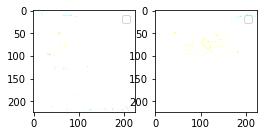

In [5]:
path_dossier_image = "../data/CNN/TEST/8710438110043.jpg"
show_image(path_dossier_image, 8, size=(300,300))

In [6]:
create_database_vectorize(name_database="efficient_netB3.csv", verbose=True,
                              size=(300, 300))

Start create new dataset


KeyboardInterrupt: 

In [7]:
train_knn(dataset, verbose=True)

Start
dataset size: (108960, 1001)
Execution time: 73.11643052101135


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


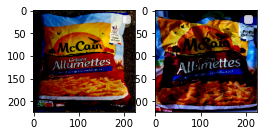

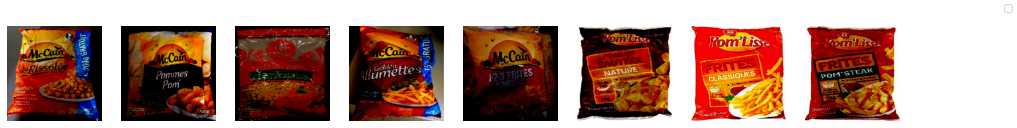

In [8]:
path_dossier_image = "../data/CNN/TEST/8710438110043.jpg"

show_image(path_dossier_image, 8)

In [6]:
train_knn("vector_mobile_net.csv")

In [4]:
display_data_vector_available()

['vector.csv',
 'vector_efficient_net.7z',
 'vector_efficient_net.csv',
 'vector_mobile_net.csv',
 'vector_VGG16.csv']

In [ ]:
#train_knn(dataset, verbose=True)
set_up_model("CNN", "efficient_net")
create_database_vectorize(name_database="efficient.csv", verbose=True, size=(456, 456))

Start create new dataset


Start create new dataset
number processed: 0
Execution time: 0.0059986114501953125
number processed: 300
Execution time: 95.12419509887695
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[3.3333333333333335, 6.333333333333334, 8.0, 8.666666666666668, 9.166666666666666, 9.833333333333332, 10.0, 10.0, 10.0, 10.0, 10.166666666666666, 11.0, 11.166666666666666, 11.166666666666666, 11.166666666666666]


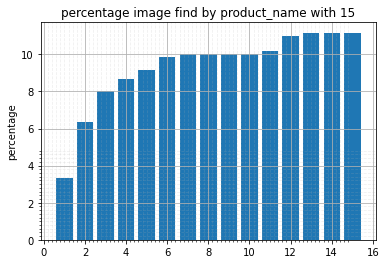

In [17]:
performance_test_cnn(nb_pictures_test=15, verbose=True)